In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
import matplotlib.image as mpimg
import warnings
#warnings.filterwarnings('ignore')

In [3]:
data = loadmat('ex4data1.mat')
mat2=loadmat("ex4weights.mat")
Theta1=mat2["Theta1"] # Theta1 has size 25 x 401
Theta2=mat2["Theta2"]

In [12]:
a=np.array([[1,1],[1,-1]])

b = np.array([[2], [3]])

c = a + b
c

array([[3, 3],
       [4, 2]])

In [5]:
X = data["X"]
y = data["y"]

l = X.shape[0]
b = X.shape[1]
X.shape

(5000, 400)

In [23]:
def sigmoid(z):
    
    return 1/ (1 + np.exp(-z))
X.shape

(5000, 400)

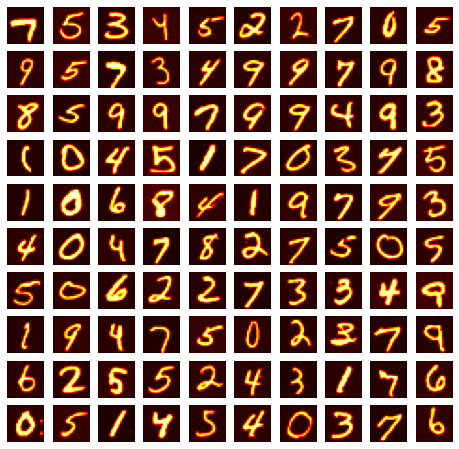

In [5]:
fig, axis = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[np.random.randint(0,5001),:].reshape(20,20,order="F"), cmap="hot") #reshape back to 20 pixel by 20 pixel
        axis[i,j].axis("off")


In [6]:

def predict(Theta1, Theta2, X):
    """
    Predict the label of an input given a trained neural network
    """
    m= X.shape[0]
    a1 = np.hstack((np.ones((m,1)),X))
    
    a2 = sigmoid(a1 @ Theta1.T)
    a2 = np.hstack((np.ones((m,1)), a2)) # hidden layer
    a3 = sigmoid(a2 @ Theta2.T) # output layer
    
    return np.argmax(a3,axis=1)+1

In [7]:
pred2 = predict(Theta1, Theta2, X)
print("Training Set Accuracy:",sum(pred2[:,np.newaxis]==y)[0]/5000*100,"%")
    

Training Set Accuracy: 97.52 %


In [45]:
def nnCostFunction(nn_params,input_layer_size, hidden_layer_size, num_labels,X, y,Lambda):

    # Reshape nn_params back into the parameters Theta1 and Theta2
    Theta1 = nn_params[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1) #(25, 401)
    Theta2 = nn_params[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)#(10, 26)
    
    m = X.shape[0]
    J=0
    X = np.hstack((np.ones((m,1)),X))
    y_new = np.zeros((m,num_labels))    #(5000, 10)
    
    a2 = sigmoid(X @ Theta1.T)
    a2 = np.hstack((np.ones((m,1)), a2)) # hidden layer
    a3 = sigmoid(a2 @ Theta2.T) # output layer
    
    for i in range(1,num_labels+1):
        y_new[:,i-1][:,np.newaxis] = np.where(y==i,1,0)
        
        
    easy =  -y_new * np.log(a3) - (1-y_new)*np.log(1-a3)
    J = np.sum(np.sum(easy, axis = 1))
    
    cost = 1/m* J
    
    reg_term =  Lambda/(2*m) * (np.sum(Theta1[:,1:]**2) + np.sum(Theta2[:,1:]**2))
    reg_J = cost + reg_term
    
    # Implement the backpropagation algorithm to compute the gradients
    
    grad1 = np.zeros((Theta1.shape))#(25, 401)
    grad2 = np.zeros((Theta2.shape))#(10, 26)
    
    for i in range(m):
        a1i = X[i,:]                           # 1 X 401
        
        z2i = a1i@Theta1.T
        a2i = sigmoid(a1i @ Theta1.T)        #1 25
        a2i = np.hstack((1,a2i))            # 1 26
        
        z3i = a2i @ Theta2.T
        a3i = sigmoid(a2i @ Theta2.T)      #1 10
        
        
        d3 = a3i - y_new[i,:]    #(10, 1)
        d2 = Theta2.T @ d3.T * np.hstack((1, sigmoidGradient(z2i))) #(26,1)
        
        
        #check = d2
        
        grad1= grad1 + d2[1:][:,np.newaxis] @ a1i[:,np.newaxis].T
        grad2 = grad2 + d3.T[:,np.newaxis] @ a2i[:,np.newaxis].T
        
    grad1 = 1/m * grad1
    grad2 = 1/m*grad2
    
    grad1_reg = grad1 + (Lambda/m) * np.hstack((np.zeros((Theta1.shape[0],1)),Theta1[:,1:]))
    grad2_reg = grad2 + (Lambda/m) * np.hstack((np.zeros((Theta2.shape[0],1)),Theta2[:,1:]))
    
    return cost, grad1, grad2,reg_J, grad1_reg,grad2_reg #,check
             

In [46]:
def sigmoidGradient(z):
    """
    computes the gradient of the sigmoid function
    """
    
    
    return sigmoid(z) *(1-sigmoid(z)) 

In [47]:
input_layer_size  = 400
hidden_layer_size = 25
num_labels = 10
nn_params = np.append(Theta1.flatten(),Theta2.flatten())
J, reg_J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, 1)[0:4:3]
print("Cost at parameters (non-regularized):",J,"\nCost at parameters (Regularized):",reg_J)
#check[:,np.newaxis].shape

Cost at parameters (non-regularized): 0.2876291651613189 
Cost at parameters (Regularized): 0.38376985909092365


In [48]:
def randInitializeWeights(L_in, L_out):
    """
    randomly initializes the weights of a layer with L_in incoming connections and L_out outgoing connections.
    """
    
    epi = (6**1/2) / (L_in + L_out)**1/2
    
 
    
    return np.random.rand(L_out,L_in +1) *(2*epi) -epi

In [49]:
initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)
initial_nn_params = np.append(initial_Theta1.flatten(),initial_Theta2.flatten())

In [50]:
debug_J  = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, 3)
print("Cost at (fixed) debugging parameters (w/ lambda = 3):",debug_J[3])

Cost at (fixed) debugging parameters (w/ lambda = 3): 0.5760512469501331


In [51]:
def gradientDescentnn(X,y,initial_nn_params,alpha,num_iters,Lambda,input_layer_size, hidden_layer_size, num_labels):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    Theta1 = initial_nn_params[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
    Theta2 = initial_nn_params[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        nn_params = np.append(Theta1.flatten(),Theta2.flatten())
        cost, grad1, grad2 = nnCostFunction(nn_params,input_layer_size, hidden_layer_size, num_labels,X, y,Lambda)[3:]
        Theta1 = Theta1 - (alpha * grad1)
        Theta2 = Theta2 - (alpha * grad2)
        J_history.append(cost)
    
    nn_paramsFinal = np.append(Theta1.flatten(),Theta2.flatten())
    return nn_paramsFinal , J_history

In [54]:
nnTheta, nnJ_history = gradientDescentnn(X,y,initial_nn_params,0.8,100,1,input_layer_size, hidden_layer_size, num_labels)



Theta1 = nnTheta[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
Theta2 = nnTheta[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)

In [55]:
pred3 = predict(Theta1, Theta2, X)
print("Training Set Accuracy:",sum(pred3[:,np.newaxis]==y)[0]/5000*100,"%")

Training Set Accuracy: 74.03999999999999 %


In [ ]:
y10 = np.zeros((5000,10))
y10[:,1][:,np.newaxis] = np.where(y==1,1,0)

In [ ]:
y10.shape

In [387]:
X[1,:].shape

(400,)

In [31]:
initial_Theta1.shape

(25, 401)

In [35]:
initial_Theta2.shape

(1, 26)

In [40]:
X[0,:].shape

(400,)

In [41]:
X[0,:]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  